# Unsupervised Learning
Unsupervised learning merupakan salah satu jenis metode dalam machine learning. Dalam metode ini tidak ada yang namanya label atau target kita hanya memiliki fitur. Kita ekspose data terhadap algoritma-algoritma yang ada lalu mengekstrak suatu pengetahuan baru yang bermanfaat. Informasi yang dapat diperoleh adalah struktur tersembunyi dalam data seperti ditemukannya pengelompokkan tertentu dalam data.  

Penerapan unsupervised learning dalam industri diantaranya adalah Customer segmentation, anomaly detection dan dimensionality reduction

### Two type of Unsupervised learning:  
* Unsupervised Transformation
>* Dimensional Reduction
>* Feature Extraction
* Clustering Algorithm
>* Non Hierarchical
>* Hierarchical


# PCA 
**Principal component analysis**  
https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643  
https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186  
https://builtin.com/data-science/step-step-explanation-principal-component-analysis

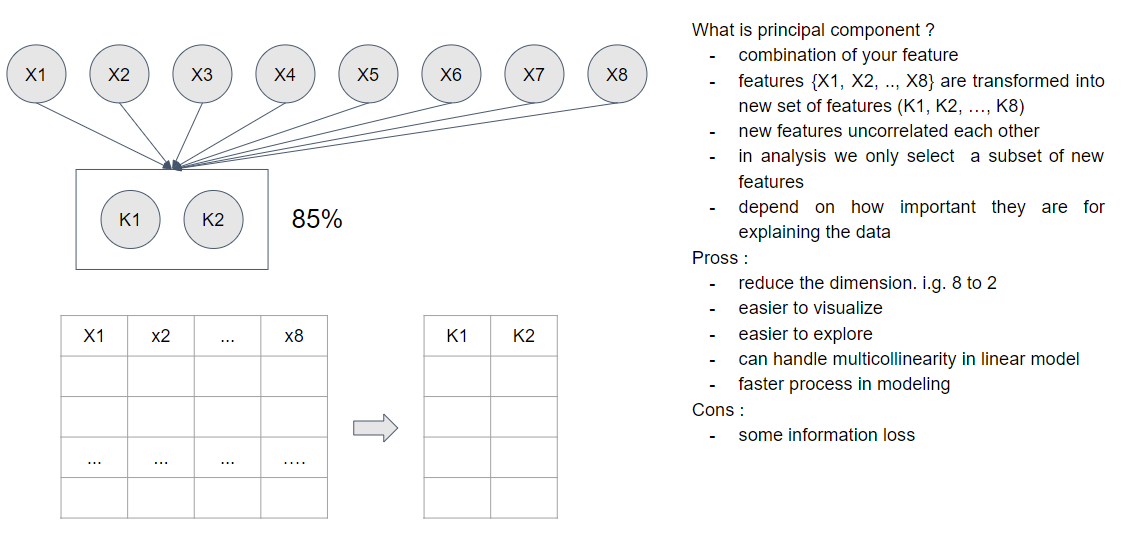

In [ ]:
PCA mereduksi dimensi dengan cara memanfaatkan fitur yang informasinya saling tumpang tindih atau dengan kata lain saling berkorelasi. Contohnya, pada kasus data tips kita memiliki dua fitur yang informasinya saling tumpang tindih, yaitu total tagihan dan banyak orang dalam satu meja. Dengan PCA, kita dapat meringkas kedua fitur tersebut menjadi satu fitur. 

Hal-hal yang perlu kita perhatikan pertama apakah kita perlu menerapkan metode standarisasi terlebih dahulu.  
Kedua, berapa fitur yang harus kita ambil agar informasi yang hilang tidak terlalu besar. 

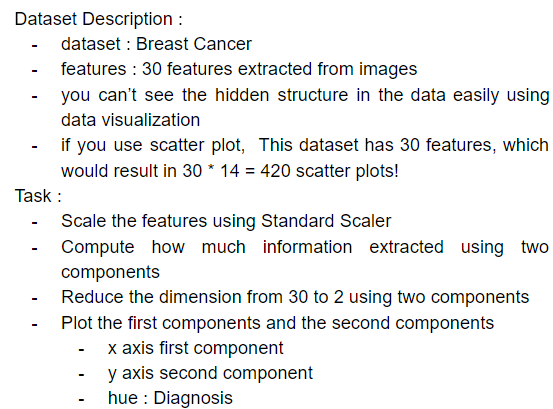

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

> ## Scaler

cancer

In [3]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(cancer.data)

In [5]:
X_scaled.shape

(569, 30)

> ## Information Extracted
berapa % informasi yang kita simpan sete;ah PCA, apabila kita hanya mengambil 2 component hasil PCA

In [6]:
from sklearn.decomposition import PCA

# made 30 components
pca = PCA(n_components = 30) #Number of components to keep
pca.fit(X_scaled)

# transform the data
X_pca = pca.transform(X_scaled)

In [7]:
variance = []

for i in range(0,30):
  variance.append(np.var(X_pca[:,i]))

In [23]:
print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance))) # apabila kita mengambil hanya 2 komponen pertama, berapa% informasi yg tersimpan

information extracted 63.24320765155942 %


> ## Reducing Dimension (30 to 2)

In [24]:
# only keep two components
pca = PCA(n_components = 2)
pca.fit(X_scaled)

# transform the data
X_pca = pca.transform(X_scaled)

In [25]:
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


> ## Scatter Plot and Clustering Result

Text(0, 0.5, 'Second Component')

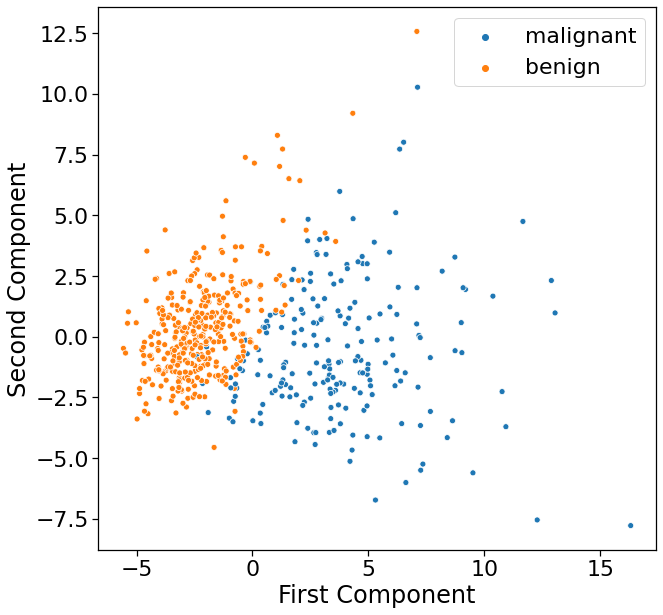

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    X_pca[:,0], 
    X_pca[:,1], 
    hue = np.where(cancer.target,'benign','malignant'))

plt.xlabel('First Component')
plt.ylabel('Second Component')

Result :
- Information extracted from 2 component 63.24 % 
- We reduce the dimension from 30 to 2 and the lost information is 36.76% but you can see that those two features can separate benign and malignant quiet well
- this also means that you can see hidden structure within the data
- malignant points are more spread than benign point


In [27]:
df=pd.read_csv('CC GENERAL.csv')

In [29]:
df.shape

(8950, 18)

In [28]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
### Exercise
Dari dataset CC General.csv, lakukan PCA, dan lihat berapa % informasi yang tersimpan apabila kita mengambil 2 komponen hasil analisis pertama. Bandingkan hasil scaling dan tanpa scaling.


In [34]:
X=df.drop(['CUST_ID','TENURE'], axis=1)
X=X.dropna()
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
pca=PCA(n_components=16)

In [38]:
pca.fit(X)
X_pca = pca.transform(X)

In [46]:
variance = []

for i in range(0,16):
  variance.append(np.var(X_pca[:,i]))

In [43]:
pca.fit(X_scaled)
X_pca_scaled = pca.transform(X_scaled)

In [50]:
variance = []

for i in range(0,16):
  variance.append(np.var(X_pca_scaled[:,i]))

In [48]:
print('information extracted wihout scaling {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

information extracted wihout scaling 65.30758351408072 %


In [51]:
    print('information extracted with scaling {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

information extracted with scaling 50.4423644930634 %


# Clustering k-Means 1  

Clustering merupakan suatu metode yang dapat digunakan untuk mendapatkan penggerombolan dalam data, harapannya, data akan dikategorikan ke dalam sejumlah grup dimana data-data yang berada dalam grup yang sama memiliki kemiripan karakteristik.

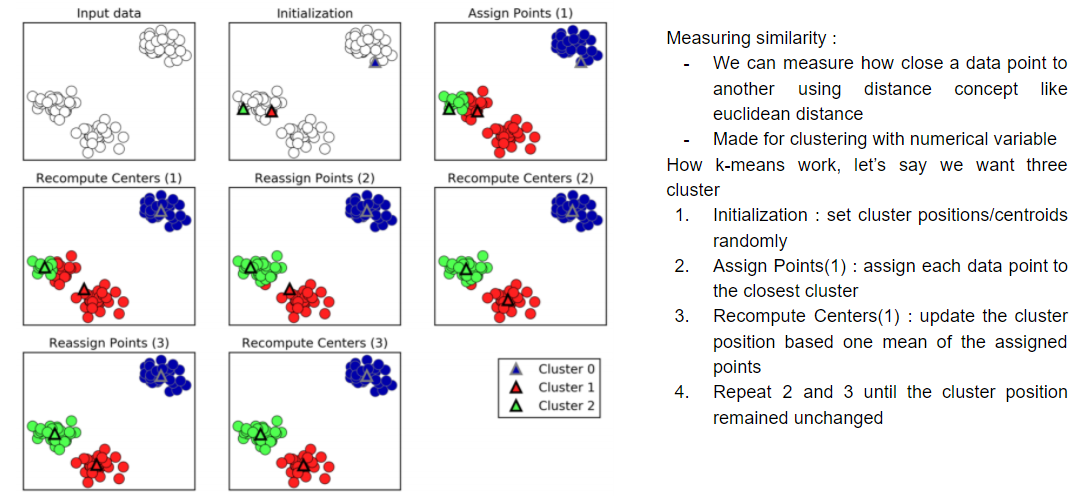

In [ ]:
Clustering K means merupakan non-hierarkikal clustering yang memakai prinsip jarak untuk membentuk cluster. 

Katakanlah kita ingin membuat tiga cluster. Pertama, K-Means akan menentukan centroid atau pusat cluster secara acak. Kedua, kita masukan setiap data point ke dalam cluster terdekat. Ketiga, kita hitung ulang centroid berdasarkan rata-rata nilai data poin yang telah dimasukan sebelumnya. Lalu, ulangi langkah ke 2 dan ke 3 sampai posisi cluster tidak berubah-ubah.

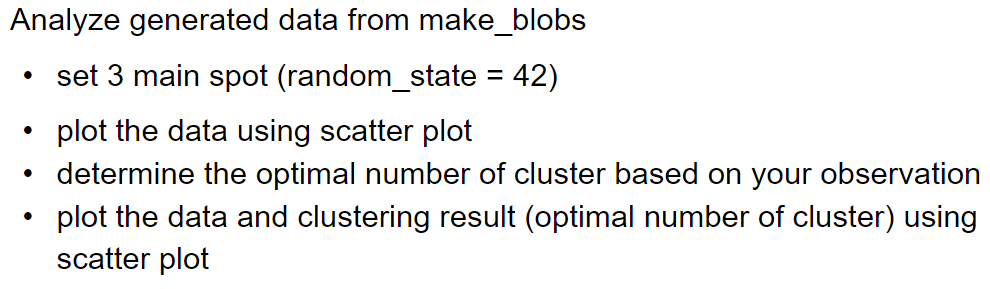

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

> ## Generate Data

In [56]:
X, y = make_blobs(random_state = 42)

> ## Scatter Plot

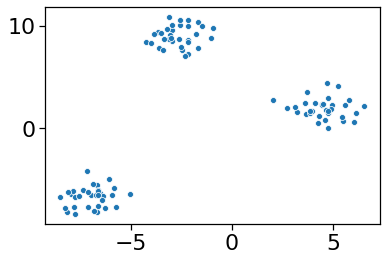

In [57]:
sns.scatterplot(X[:,0],X[:,1])

> ## Fit K-Means

In [66]:
kmeans= KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

> ## Scatterplot and Clustering Result

In [61]:
kmeans.labels_

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0])

In [67]:
kmeans.cluster_centers_

array([[156.11111111, 151.55555556],
       [174.66666667, 157.55555556],
       [179.5       , 178.25      ]])

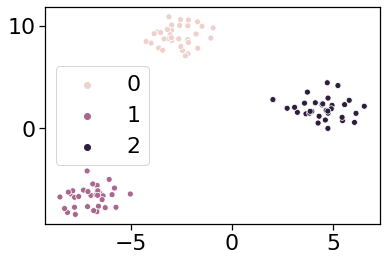

In [62]:
sns.scatterplot(X[:,0],X[:,1], hue = kmeans.labels_)

# Clustering k-Means 2

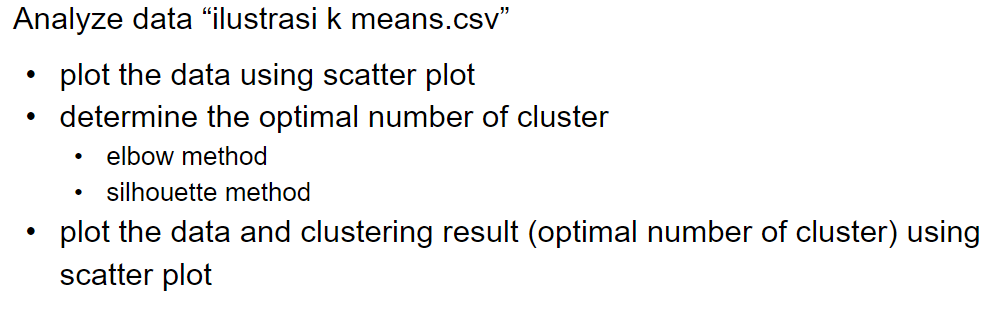

In [80]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score 

import seaborn as sns
import matplotlib.pyplot as plt

> ## Data

In [64]:
df = pd.read_csv('ilustrasi k means.csv', sep = ";")
X = df

In [17]:
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


Text(0, 0.5, 'Tinggi Badan Istri')

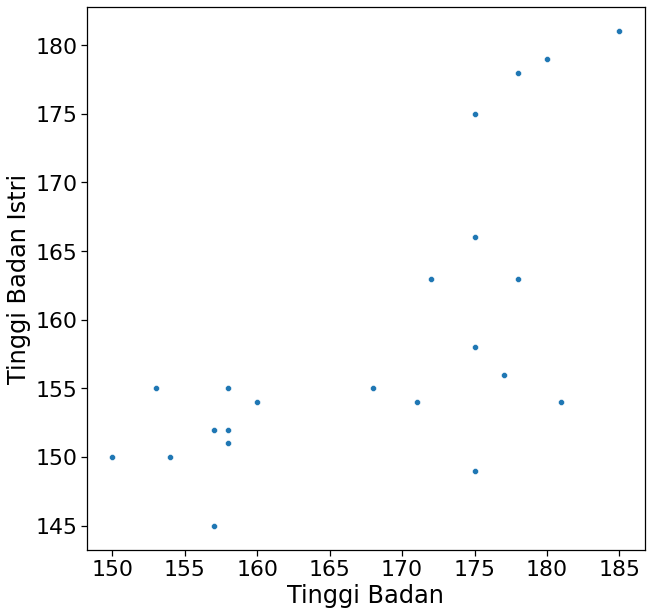

In [18]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

> ## Determine The Optimal Number Of Cluster

ELBOW METHOD

In [68]:
# clustering variation
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters=k).fit(X) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

# within sumsq
D_k = [cdist(X, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis=1) for D in D_k] 
dist = [np.min(D, axis=1) for D in D_k] 
avgWithinSS = [sum(d)/X.shape[0] for d in dist] 

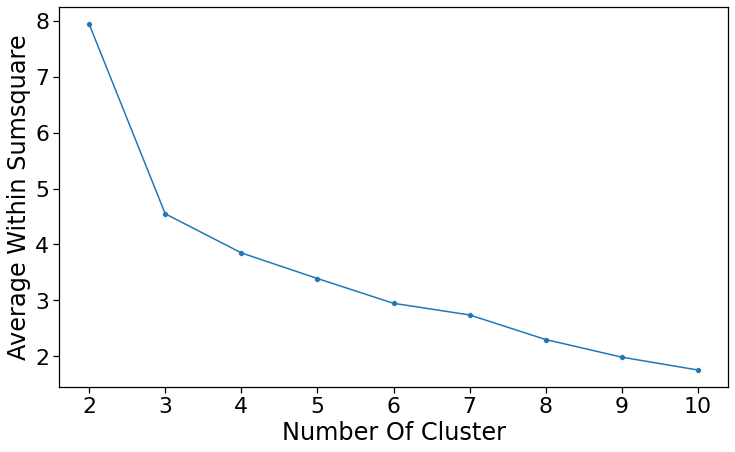

In [69]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster, avgWithinSS)
sns.scatterplot(number_of_cluster, avgWithinSS)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within Sumsquare')
plt.show()

In [ ]:
Mengukur seberapa mirip data dalam satu cluster yang sama. Beberapa ukuran kemiripan yang dapat digunakan diantaranya adalah average sum-square dan F-statistic.


SHILHOUETTE METHOD  
Silhouette score pada dasarnya suatu ukuran yang mengkombinasikan seberapa dekat setiap data poin dalam suatu cluster yang sama dengan seberapa dekat setiap data poin pada cluster tersebut dengan data poin pada cluster lainnya.  

Nilai berkisar antara -1 sampai 1:

- Jika nilai silhouette semakin dekat dengan satu semakin jelas juga terpisahnya cluster-cluster yang telah dibuat. 
- Jika nilai silhouette dekat dengan nol, perbedaan pada cluster yang terbentuk tidak akan jelas terlihat. 
- Nilai silhouette score antara 0 hingga -1 berarti terdapat ketidaksesuaian antara cluster dengan data points di dalamnya. 

https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb#  

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891

In [70]:
  kmeans = KMeans(n_clusters = 2)
  kmeans.fit(X)

KMeans(n_clusters=2)

In [22]:
labels = kmeans.labels_
silhouette_score(X, labels, metric = 'euclidean')

0.5080353833629737

In [81]:
silhouette_scores=[]
number_of_cluster=range(2,11)

for i in number_of_cluster:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)

    labels=kmeans.labels_
    silhouette_scores.append(silhouette_score(X,labels,metric='euclidean'))

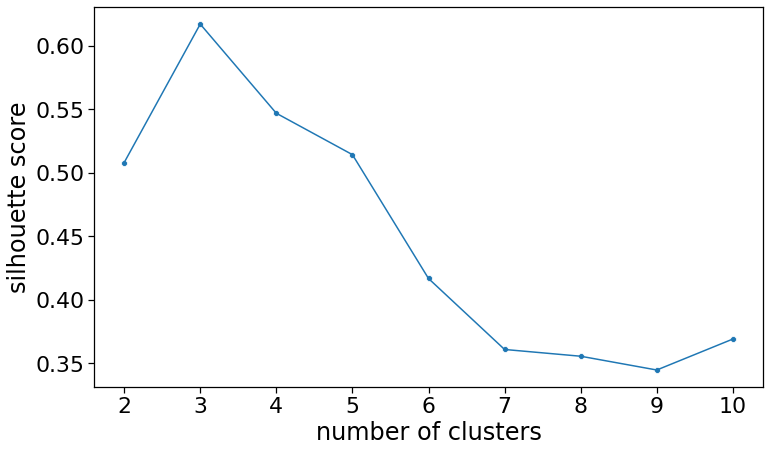

In [82]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster,silhouette_scores)
sns.scatterplot(number_of_cluster,silhouette_scores)

plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

> ## Final Result

In [83]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [84]:
df['cluster']=kmeans.labels_
df

,tinggibadan,tinggibadanistri,cluster
0,175,175,0
1,178,178,0
2,175,166,2
3,180,179,0
4,185,181,0
5,178,163,2
6,175,158,2
7,181,154,2
8,168,155,2
9,171,154,2


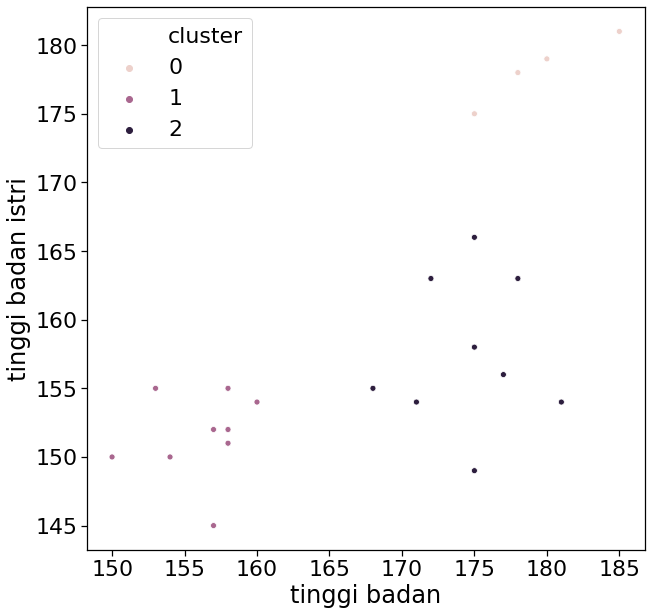

In [86]:
plt.figure(figsize=(10,10))
sns.scatterplot( x='tinggibadan', y='tinggibadanistri', hue='cluster', data=df)
plt.xlabel('tinggi badan')
plt.ylabel('tinggi badan istri')

plt.show()

In [87]:
df=pd.read_csv('Mall_Customers.csv')

In [88]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
### Latihan

Pakai Mall_Customers.csv sebagai data untuk clustering K-means model.
* drop CustomerID dan ubah feature gender menjadi 0 untuk pria dan 1 untuk wanita
* carilah nilai K terbaik untuk membentuk cluster.
* coba visualisasikan data hasil clustering kalian dengan kombinasi feature-feature yang ada. (ex: Gender& Age; Gender& Annual Income, Age & Annual income, dst)

In [ ]:
* Lakukan EDA singkat untuk data Mall_Customers, ada hal menarik apa yg bisa kalian simpulkan?
* Kira-kira, 2 feature mana saja yang paling tepat untuk digunakan dalam clustering data Mall_Customers.csv?
* Coba lakukan clustering hanya dengan feature yang kalian pilih.
* Apakah ada perubahan pada nilai K terbaik?

> # Clustering Agglomerative

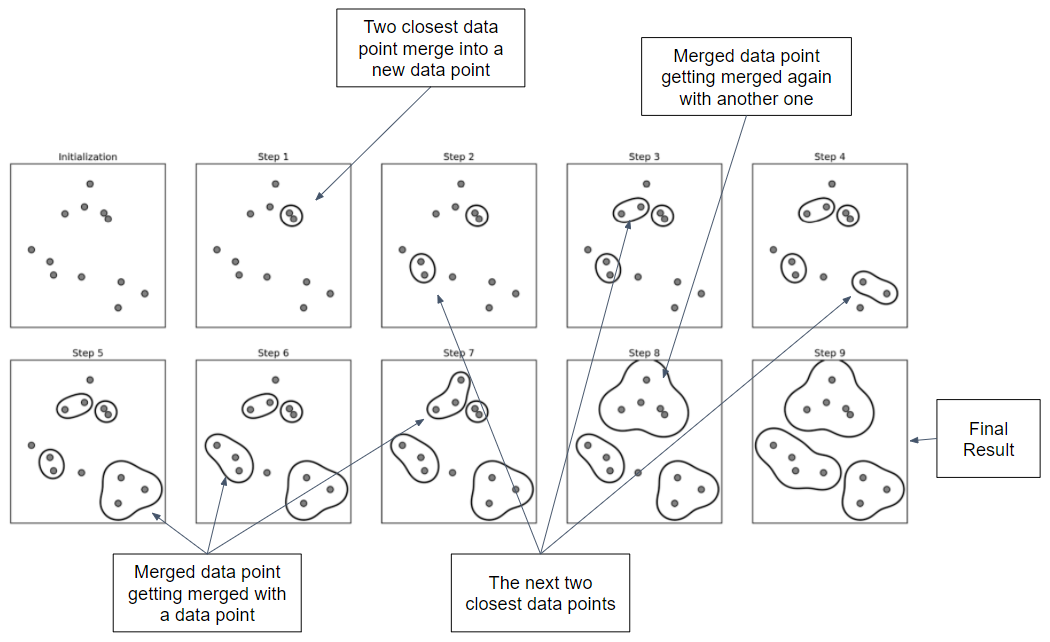

Clustering dengan metode agglomerative menganggap bahwa pada awalnya setiap data points merupakan satu cluster tersendiri. Setiap data poin akan di-merge menjadi satu data poin yang baru.  

Metode ini kurang direkomendasikan untuk data set yang ukurannya terlalu besar karena akan memakan waktu terlalu lama. Metode ini juga sebenarnya dibuat untuk clustering dengan menggunakan fitur numerik.  

Metode penggabungan:  
* Metode ward pada dasarnya menggunakan variance untuk menggabungkan cluster  
* Complete linkage menggabungkan dua cluster yang memiliki jarak maksimum (jarak dua titik terjauh) terkecil di antara titik-titik yang ada di dalam kedua cluster tersebut.  
* Linkage average menggabungkan dua cluster berdasarkan rata-rata jarak dari setiap titik dalam satu cluster terhadap setiap titik dalam cluster lainnya. Cluster yang digabungkan adalah dua cluster yang rata-rata jaraknya paling kecil.

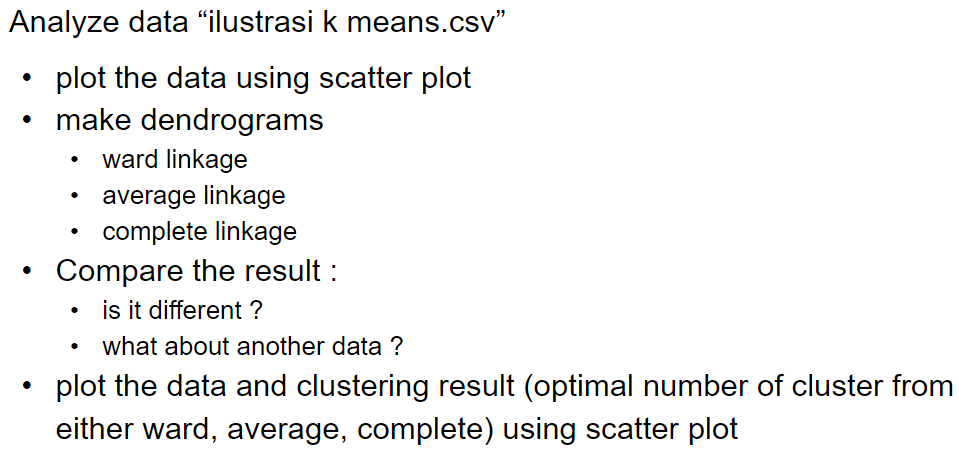

In [1]:
import pandas as pd
import numpy as np

# from sklearn.cluster import KMeans

# from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

import seaborn as sns
import matplotlib.pyplot as plt

> ## Data

In [12]:
df = pd.read_csv('ilustrasi k means.csv', sep = ";")
X = df

In [13]:
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


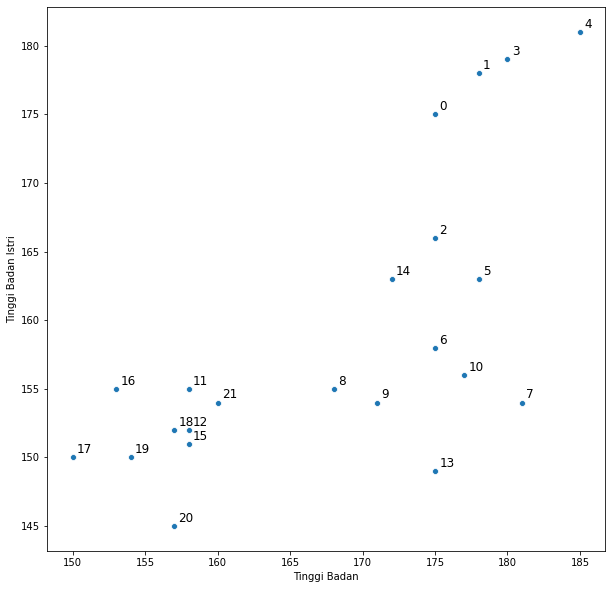

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='tinggibadan', y='tinggibadanistri', data=df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i,txt in enumerate(range(0,df.shape[0])):
    plt.annotate(txt,(df['tinggibadan'][i]+0.3, df['tinggibadanistri'][i]+0.3), fontsize=12)

> ## Dendogram

In [6]:
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

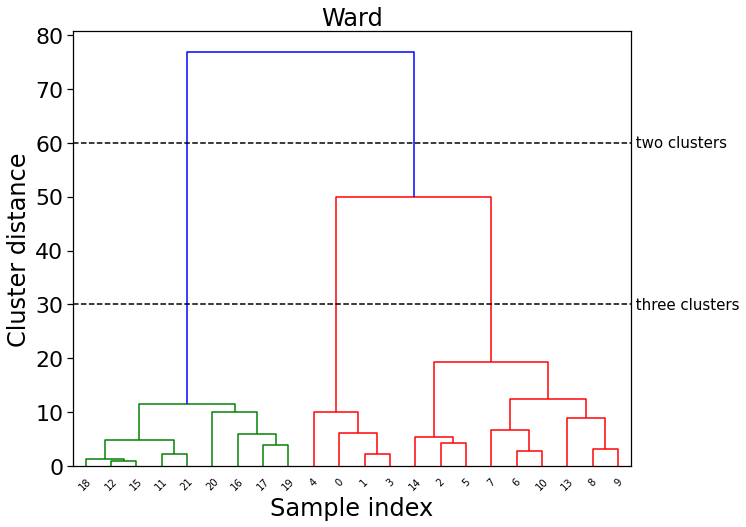

In [33]:
linkage_array = ward(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [60, 60], '--', c='k')
ax.plot(bounds, [30, 30], '--', c='k')
ax.text(bounds[1], 60, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 30, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Ward')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

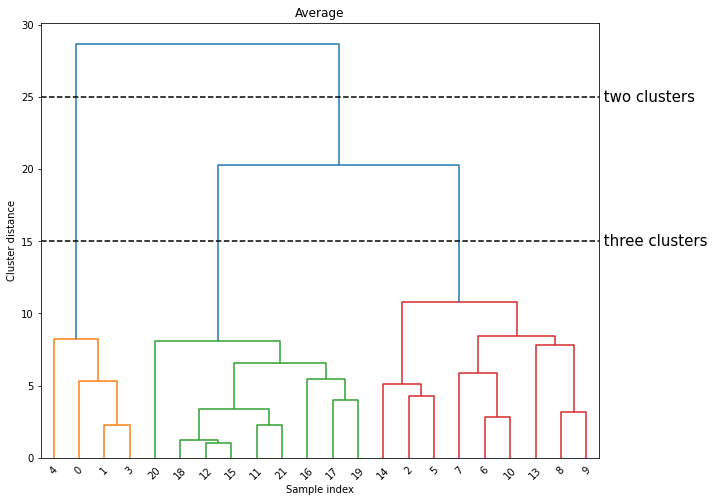

In [8]:
linkage_array = average(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [25, 25], '--', c='k')
ax.plot(bounds, [15, 15], '--', c='k')
ax.text(bounds[1], 25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 15, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Average')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

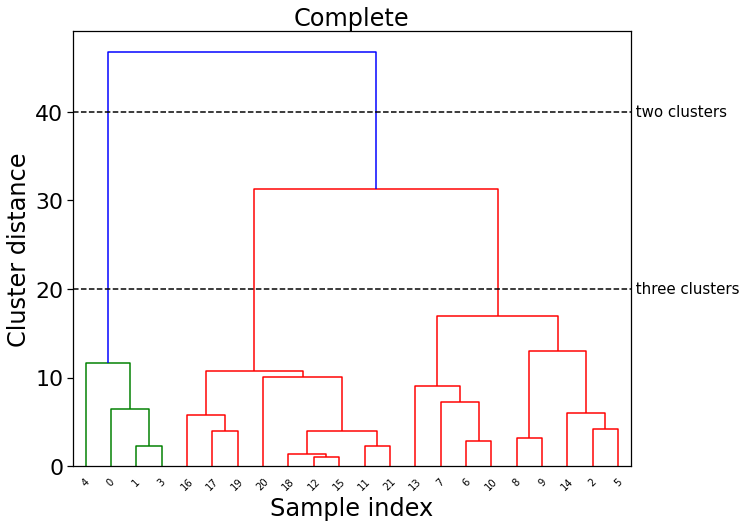

In [35]:
linkage_array = complete(X)

plt.figure(figsize = (10,8))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [40, 40], '--', c='k')
ax.plot(bounds, [20, 20], '--', c='k')
ax.text(bounds[1], 40, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 20, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Complete')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

> ## Result Comparison

In [14]:
agg_ward=AgglomerativeClustering(n_clusters=3,linkage='ward') #default linkage ward, n_cluster= 2
df['ward']= agg_ward.fit_predict(X)

agg_complete=AgglomerativeClustering(n_clusters=3,linkage='complete')
df['complete']=agg_complete.fit_predict(X)

agg_average=AgglomerativeClustering(n_clusters=3,linkage='average')
df['average']=agg_average.fit_predict(X)


In [15]:
df

,tinggibadan,tinggibadanistri,ward,complete,average
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1
5,178,163,0,0,0
6,175,158,0,0,0
7,181,154,0,0,0
8,168,155,0,0,0
9,171,154,0,0,0


> ## Scatter Plot and Clustering Result

Text(0, 0.5, 'Tinggi Badan Istri')

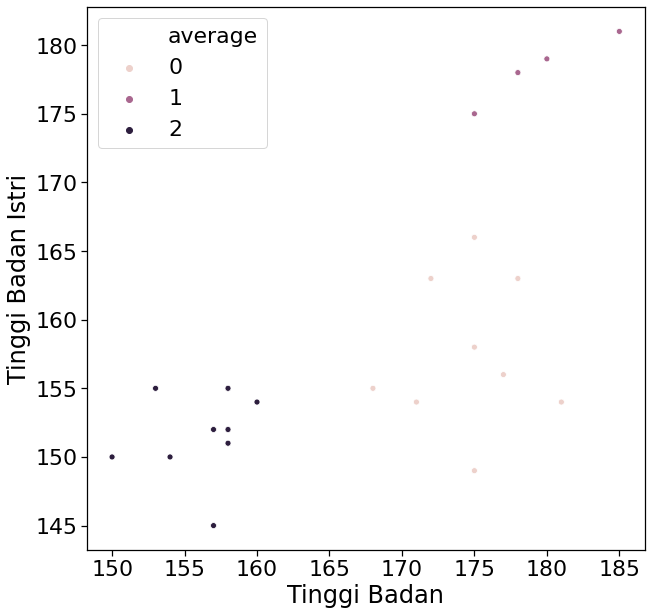

In [16]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri',
    hue = 'average', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

# Clustering DBSCAN

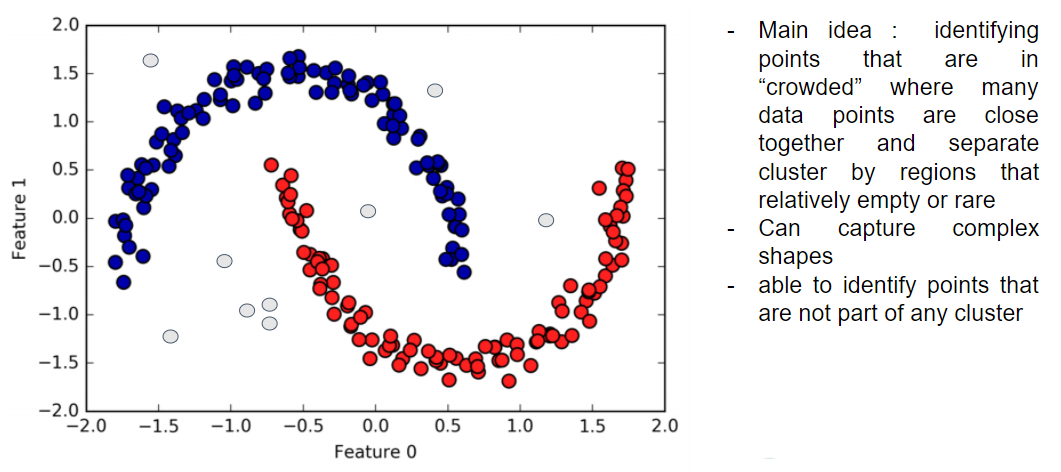

DBSCAN merupakan singkatan dari density-based spatial clustering of applications with noise.  

DBSCAN merupakan metode clustering yang mengidentifikasi sekumpulan data points yang posisinya berdekatan dan memisahkan sekumpulan data points tersebut berdasarkan region yang relatif kosong.  

Dengan DBSCAN kita juga dapat mengidentifikasi data poin yang sebenarnya bukan merupakan bagian dari cluster manapun.  

DBSCAN tidak memerlukan definisi banyaknya cluster tapi yang DBSCAN perlukan adalah min samples dan epsilon.  
* Min samples mendefinisikan ukuran minimum banyaknya data dalam satu cluster. Misalkan kita ingin agar cluster kita memiliki ukuran minimum 40 maka kita akan memperoleh cluster yang banyaknya minimal 40. Penggerombolan yang terjadi di bawah 40 data poin tidak akan dianggap cluster.  

* epsilon adalah jarak maksimal antara 2 data point agak bisa dianggap sebagai tetangga

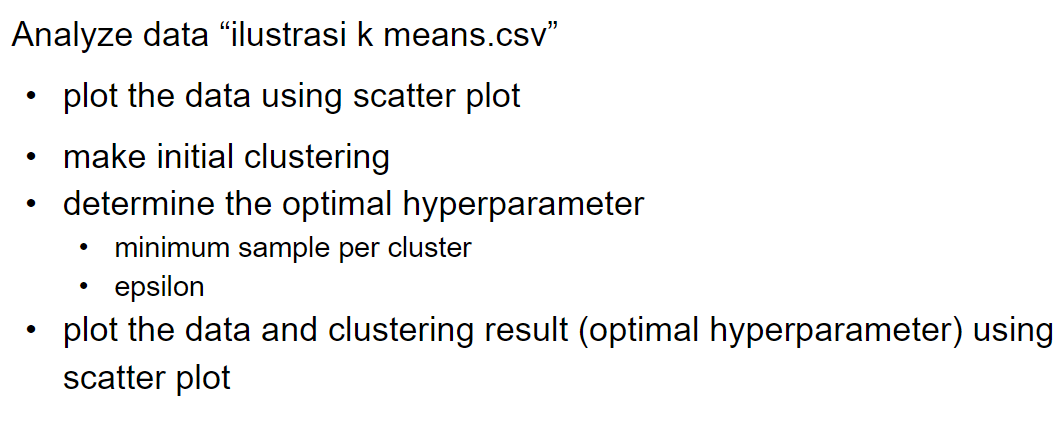

> ## Data

In [31]:
df = pd.read_csv('ilustrasi k means.csv', sep = ";")
X = df

In [32]:
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


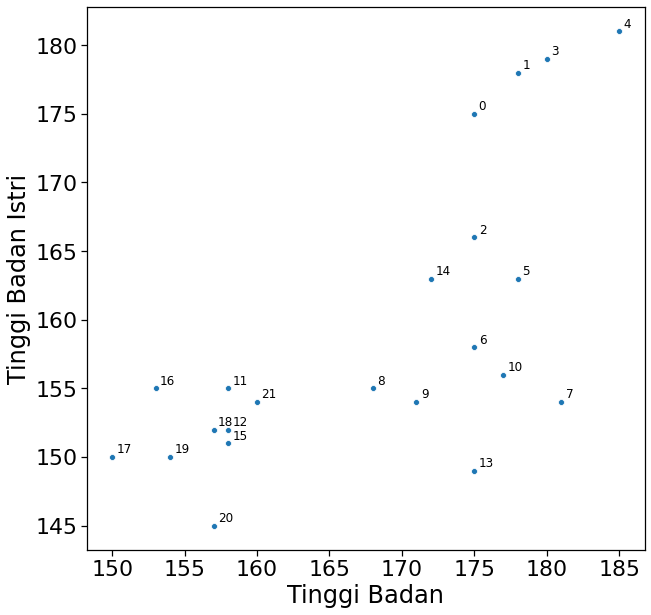

In [20]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

for i, txt in enumerate(range(0,df.shape[0])):
    plt.annotate(txt, (df['tinggibadan'][i]+0.3, df['tinggibadanistri'][i]+0.3), fontsize = 12)

> ## Initial Clustering

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
dbscan = DBSCAN(eps = 0.8, min_samples=6)
clusters = dbscan.fit_predict(X_scaled)

In [41]:
print(clusters)

[-1 -1  0 -1 -1  0  0  0  0  0  0  1  1  0  0  1  1  1  1  1  1  1]


In [42]:
silhouette_score(X_scaled, clusters)

0.6161772649616482

> ## Optimizing minimum samples and epsilon

In [44]:
for eps in [i/10 for i in range (6,8)]:
    for min_sample in range (4,6):
        print('\neps={}'.format(eps))
        print(f'min_sample={min_sample}')
        dbscan=DBSCAN(eps=eps,min_samples=min_sample)
        labels=dbscan.fit_predict(X_scaled)
        silh=silhouette_score(X_scaled,labels)
        print(f'cluster present: {np.unique(labels)}')
        print(f'cluster size: {np.bincount(labels +1)}')
        print(f'silhouette score: {silh}')


eps=0.6
min_sample=4
cluster present: [-1  0  1]
cluster size: [7 6 9]
silhouette score: 0.3901682187136734

eps=0.6
min_sample=5
cluster present: [-1  0  1]
cluster size: [8 5 9]
silhouette score: 0.35497113213899967

eps=0.7
min_sample=4
cluster present: [0 1 2]
cluster size: [0 4 9 9]
silhouette score: 0.6161772649616482

eps=0.7
min_sample=5
cluster present: [-1  0  1]
cluster size: [4 9 9]
silhouette score: 0.6161772649616482


The best clustering result is clustering with hyperparameters eps = 0.7 and min_samples = 4 because no observation included into nois (easier to interpret) and the biggest silhouette score.

> ## Final Result

In [49]:
dbscan = DBSCAN(eps = 0.7, min_samples=4)
clusters = dbscan.fit_predict(X_scaled)

In [50]:
print(clusters)

[0 0 1 0 0 1 1 1 1 1 1 2 2 1 1 2 2 2 2 2 2 2]


In [51]:
df['clusters'] = clusters

Text(0, 0.5, 'Tinggi Badan Istri')

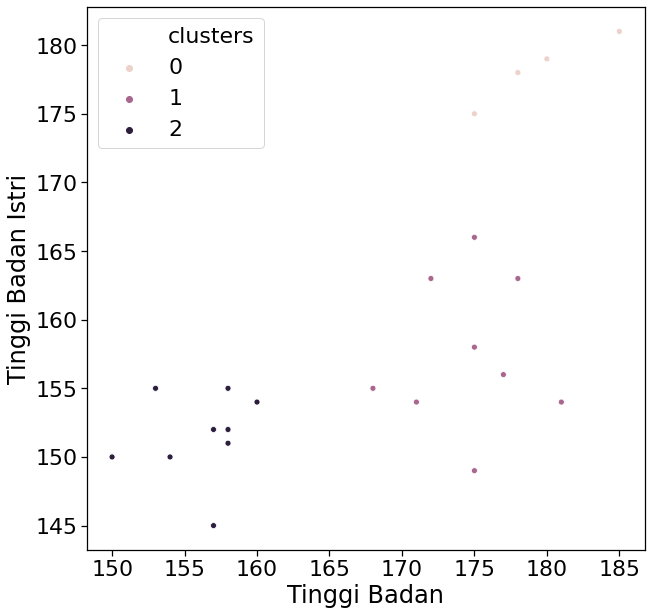

In [52]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri',
    hue = 'clusters', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

**Analisis Mall_Customers.csv**

Gunakan features `Age` dan `Spending Score`, scaling features tersebut dengan standard scaler, lalu bandingkan performa dan hasil clustering dengan metode K-means, agglomerative dan DB SCAN.  

*  Gunakan silhouette score untuk mencari parameter terbaik